In [40]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
from models.MLP import MLP
from utils.dataPreprocessing import data_preprocessing
from utils.dataVisualisation import plot_training

In [41]:
df_data = pd.read_csv('../data/train.csv')
df_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [42]:
X, t = data_preprocessing(df_data, normalized=True, one_hot=True)
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

## Training with a stochastic gradient descent

In [43]:
model = MLP(num_epochs=500)
model.set_model(input_size=X_train.shape[1], output_size=t_train.shape[1], activation_function='relu')
model.set_optimizer(optim='SGD', lr=1e-2, reg=0)

In [44]:
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59167, Accuracy: 1.59%
Epoch 2/500, Loss: 4.51137, Accuracy: 2.60%
Epoch 3/500, Loss: 4.21840, Accuracy: 3.46%
Epoch 4/500, Loss: 3.73498, Accuracy: 9.38%
Epoch 5/500, Loss: 3.16478, Accuracy: 17.03%
Epoch 6/500, Loss: 2.40506, Accuracy: 31.60%
Epoch 7/500, Loss: 1.72479, Accuracy: 46.75%
Epoch 8/500, Loss: 1.22795, Accuracy: 61.90%
Epoch 9/500, Loss: 0.87010, Accuracy: 72.15%
Epoch 10/500, Loss: 0.63773, Accuracy: 80.95%
Epoch 11/500, Loss: 0.46241, Accuracy: 87.30%
Epoch 12/500, Loss: 0.29686, Accuracy: 92.50%
Epoch 13/500, Loss: 0.22099, Accuracy: 94.66%
Epoch 14/500, Loss: 0.12588, Accuracy: 97.55%
Epoch 15/500, Loss: 0.11870, Accuracy: 97.69%
Epoch 16/500, Loss: 0.09359, Accuracy: 98.12%
Epoch 17/500, Loss: 0.09824, Accuracy: 97.69%
Epoch 18/500, Loss: 0.06463, Accuracy: 98.70%
Epoch 19/500, Loss: 0.05757, Accuracy: 98.99%
Epoch 20/500, Loss: 0.04822, Accuracy: 98.99%
Epoch 21/500, Loss: 0.02984, Accuracy: 100.00%
Epoch 22/500, Loss: 0.02385, Accuracy: 99.86%


In [45]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 96.30% on test data


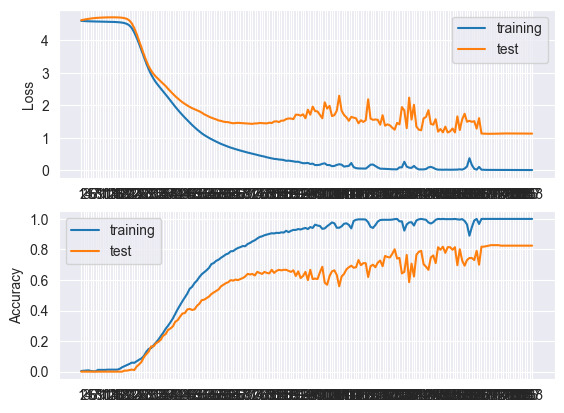

In [9]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

### Add a regularization term

In [10]:
model.set_optimizer(optim='SGD', lr=1e-2, reg=1e-3)
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.60441, Accuracy: 0.72%
Epoch 2/500, Loss: 4.59728, Accuracy: 0.58%
Epoch 3/500, Loss: 4.59246, Accuracy: 0.43%
Epoch 4/500, Loss: 4.58894, Accuracy: 0.58%
Epoch 5/500, Loss: 4.58646, Accuracy: 0.43%
Epoch 6/500, Loss: 4.58451, Accuracy: 0.58%
Epoch 7/500, Loss: 4.58290, Accuracy: 0.58%
Epoch 8/500, Loss: 4.58157, Accuracy: 1.01%
Epoch 9/500, Loss: 4.58031, Accuracy: 1.01%
Epoch 10/500, Loss: 4.57915, Accuracy: 0.87%
Epoch 11/500, Loss: 4.57793, Accuracy: 1.01%
Epoch 12/500, Loss: 4.57666, Accuracy: 1.01%
Epoch 13/500, Loss: 4.57520, Accuracy: 1.44%
Epoch 14/500, Loss: 4.57342, Accuracy: 1.73%
Epoch 15/500, Loss: 4.57119, Accuracy: 2.02%
Epoch 16/500, Loss: 4.56818, Accuracy: 2.45%
Epoch 17/500, Loss: 4.56399, Accuracy: 2.45%
Epoch 18/500, Loss: 4.55754, Accuracy: 2.74%
Epoch 19/500, Loss: 4.54723, Accuracy: 2.89%
Epoch 20/500, Loss: 4.52958, Accuracy: 2.89%
Epoch 21/500, Loss: 4.49790, Accuracy: 3.17%
Epoch 22/500, Loss: 4.44152, Accuracy: 2.89%
Epoch 23/500, Loss:

In [11]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 69.36% on test data


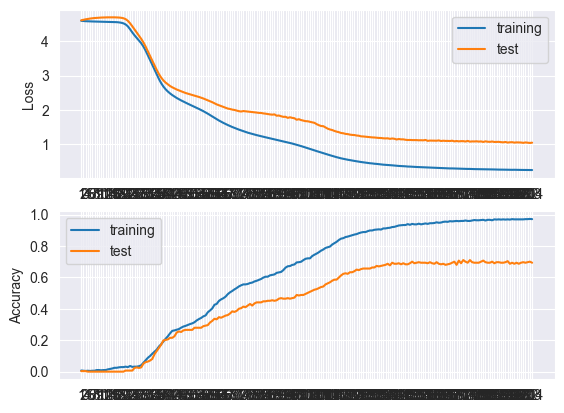

In [13]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

## hyperparameters optimization

In [12]:
reg_choices = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lr_choices = [1e-4, 1e-3, 1e-2, 1e-1]
best_params, accuracy_historic = model.k_fold_cross_validation(X_train, t_train, lr_choices=lr_choices, reg_choices=reg_choices)

testing parameters: learning_rate = 1e-04,    regularization = 1e-09
K = 0, accuracy: 0.007
K = 1, accuracy: 0.007
K = 2, accuracy: 0.014
K = 3, accuracy: 0.007
K = 4, accuracy: 0.000
Best val accuracy: 0.007 | lr: 1e-04 | l2_reg: 1e-09
testing parameters: learning_rate = 1e-04,    regularization = 1e-08
K = 0, accuracy: 0.000
K = 1, accuracy: 0.007
K = 2, accuracy: 0.000
K = 3, accuracy: 0.000
K = 4, accuracy: 0.014
testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.000
K = 1, accuracy: 0.000
K = 2, accuracy: 0.014
K = 3, accuracy: 0.007
K = 4, accuracy: 0.000
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.007
K = 1, accuracy: 0.000
K = 2, accuracy: 0.000
K = 3, accuracy: 0.000
K = 4, accuracy: 0.007
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.000
K = 1, accuracy: 0.014
K = 2, accuracy: 0.000
K = 3, accuracy: 0.000
K = 4, accuracy: 0.007
testing parameters: learnin

<Axes: >

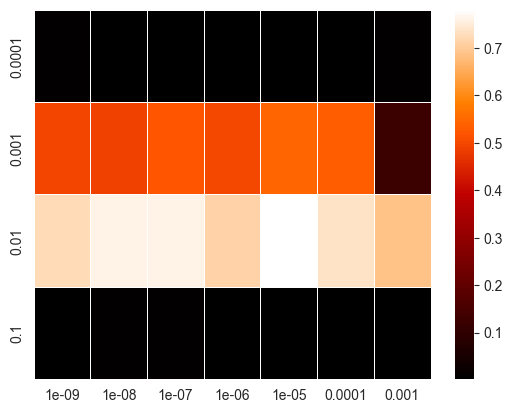

In [13]:
ax = sns.heatmap(accuracy_historic, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=reg_choices,     
                 yticklabels=lr_choices)
ax.set(xlabel='weight_decay', ylabel='learning rate')

In [14]:
best_params

(0.01, 1e-05)

### Complet learning with the best hyperparameters

In [14]:
model.set_optimizer(optim='SGD', lr=best_params[0], reg=best_params[1])
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.60533, Accuracy: 0.72%
Epoch 2/500, Loss: 4.59805, Accuracy: 1.01%
Epoch 3/500, Loss: 4.59307, Accuracy: 1.15%
Epoch 4/500, Loss: 4.58953, Accuracy: 0.87%
Epoch 5/500, Loss: 4.58693, Accuracy: 0.87%
Epoch 6/500, Loss: 4.58494, Accuracy: 1.01%
Epoch 7/500, Loss: 4.58329, Accuracy: 1.30%
Epoch 8/500, Loss: 4.58190, Accuracy: 1.30%
Epoch 9/500, Loss: 4.58061, Accuracy: 1.30%
Epoch 10/500, Loss: 4.57934, Accuracy: 1.30%
Epoch 11/500, Loss: 4.57800, Accuracy: 1.30%
Epoch 12/500, Loss: 4.57650, Accuracy: 1.44%
Epoch 13/500, Loss: 4.57472, Accuracy: 1.44%
Epoch 14/500, Loss: 4.57257, Accuracy: 1.59%
Epoch 15/500, Loss: 4.56970, Accuracy: 2.02%
Epoch 16/500, Loss: 4.56565, Accuracy: 2.74%
Epoch 17/500, Loss: 4.55958, Accuracy: 3.17%
Epoch 18/500, Loss: 4.55002, Accuracy: 3.03%
Epoch 19/500, Loss: 4.53419, Accuracy: 3.03%
Epoch 20/500, Loss: 4.50588, Accuracy: 3.17%
Epoch 21/500, Loss: 4.45362, Accuracy: 2.89%
Epoch 22/500, Loss: 4.36363, Accuracy: 2.89%
Epoch 23/500, Loss:

In [15]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 82.83% on test data


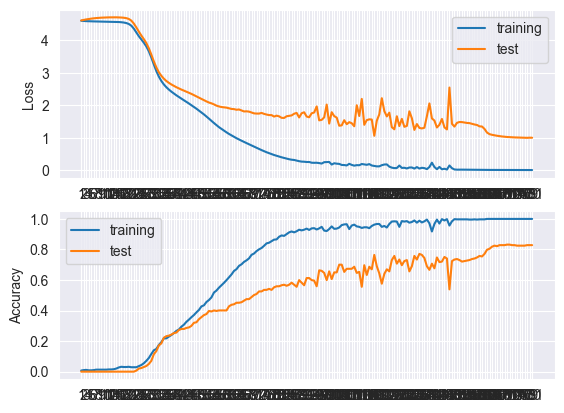

In [17]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

### Data normalization

In [18]:
df_data.iloc[:,2:].max()

margin1      0.087891
margin2      0.205080
margin3      0.156250
margin4      0.169920
margin5      0.111330
               ...   
texture60    0.578130
texture61    0.151370
texture62    0.375980
texture63    0.086914
texture64    0.141600
Length: 192, dtype: float64

The data are not normalized, which can unfairly give more weight to some features than to others. To overcome this problem, we normalize our data using a min-max normalization.

In [46]:
X = ((df_data.iloc[:,2:] - df_data.iloc[:,2:].min()) / (df_data.iloc[:,2:].max() - df_data.iloc[:,2:].min())).values

species = df_data['species'].unique()

# Creation of the one-hot vector for the targets matrix
t = np.zeros((len(X),species.size)) 
for i in range(species.size):
    t[df_data['species'] == species[i], i] = 1
    
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3, random_state=0)

In [47]:
model.set_optimizer(optim='SGD', lr=1e-3, reg=1e-4)
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59617, Accuracy: 1.01%
Epoch 2/500, Loss: 4.59183, Accuracy: 1.01%
Epoch 3/500, Loss: 4.58761, Accuracy: 1.30%
Epoch 4/500, Loss: 4.58340, Accuracy: 2.02%
Epoch 5/500, Loss: 4.57898, Accuracy: 2.02%
Epoch 6/500, Loss: 4.57414, Accuracy: 2.16%
Epoch 7/500, Loss: 4.56873, Accuracy: 2.60%
Epoch 8/500, Loss: 4.56262, Accuracy: 4.18%
Epoch 9/500, Loss: 4.55557, Accuracy: 4.62%
Epoch 10/500, Loss: 4.54723, Accuracy: 4.47%
Epoch 11/500, Loss: 4.53720, Accuracy: 4.47%
Epoch 12/500, Loss: 4.52524, Accuracy: 3.75%
Epoch 13/500, Loss: 4.51096, Accuracy: 2.89%
Epoch 14/500, Loss: 4.49398, Accuracy: 2.89%
Epoch 15/500, Loss: 4.47403, Accuracy: 2.89%
Epoch 16/500, Loss: 4.45132, Accuracy: 3.03%
Epoch 17/500, Loss: 4.42613, Accuracy: 3.03%
Epoch 18/500, Loss: 4.39863, Accuracy: 3.17%
Epoch 19/500, Loss: 4.36907, Accuracy: 3.17%
Epoch 20/500, Loss: 4.33754, Accuracy: 3.46%
Epoch 21/500, Loss: 4.30403, Accuracy: 4.33%
Epoch 22/500, Loss: 4.26817, Accuracy: 5.34%
Epoch 23/500, Loss:

In [21]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 93.60% on test data


The model accuracy is hugely improve with normalized data.

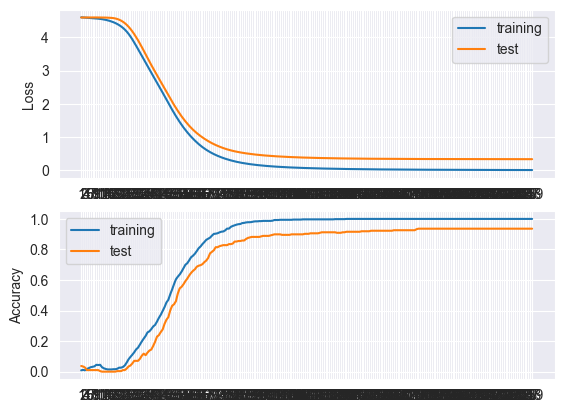

In [22]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

In [22]:
lr_choices = [1e-4, 1e-3, 1e-2, 1e-1]
reg_choices = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
best_params_norm, accuracy_historic_norm = model.k_fold_cross_validation(X_train, t_train, lr_choices=lr_choices, reg_choices=reg_choices)

testing parameters: learning_rate = 1e-04,    regularization = 1e-09
K = 0, accuracy: 0.424
K = 1, accuracy: 0.468
K = 2, accuracy: 0.288
K = 3, accuracy: 0.333
K = 4, accuracy: 0.362
Best val accuracy: 0.375 | lr: 1e-04 | l2_reg: 1e-09
testing parameters: learning_rate = 1e-04,    regularization = 1e-08
K = 0, accuracy: 0.475
K = 1, accuracy: 0.381
K = 2, accuracy: 0.309
K = 3, accuracy: 0.348
K = 4, accuracy: 0.377
Best val accuracy: 0.378 | lr: 1e-04 | l2_reg: 1e-08
testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.374
K = 1, accuracy: 0.396
K = 2, accuracy: 0.317
K = 3, accuracy: 0.275
K = 4, accuracy: 0.384
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.374
K = 1, accuracy: 0.374
K = 2, accuracy: 0.424
K = 3, accuracy: 0.355
K = 4, accuracy: 0.362
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.367
K = 1, accuracy: 0.460
K = 2, accuracy: 0.367
K = 3, accuracy: 0.4

<Axes: >

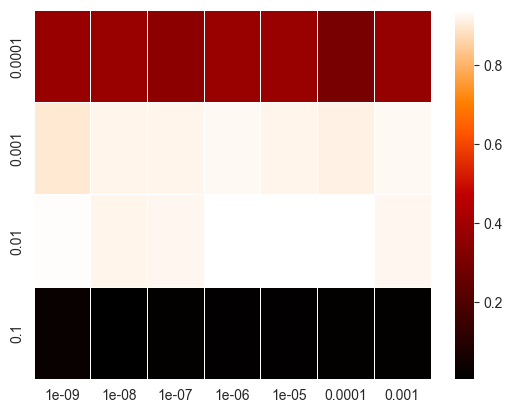

In [23]:
ax = sns.heatmap(accuracy_historic_norm, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=reg_choices, 
                 yticklabels=lr_choices)
ax.set(xlabel='weight decay', ylabel='learning rate')

In [24]:
best_params_norm

(0.01, 1e-06)

### Complete learning with the best hyperparameters

In [23]:
model.set_optimizer(optim='SGD', lr=best_params_norm[0], reg=best_params_norm[1])
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59420, Accuracy: 1.44%
Epoch 2/500, Loss: 4.53874, Accuracy: 2.16%
Epoch 3/500, Loss: 4.34231, Accuracy: 3.17%
Epoch 4/500, Loss: 3.87289, Accuracy: 8.08%
Epoch 5/500, Loss: 3.18734, Accuracy: 17.32%
Epoch 6/500, Loss: 2.47515, Accuracy: 30.30%
Epoch 7/500, Loss: 1.82653, Accuracy: 45.45%
Epoch 8/500, Loss: 1.31529, Accuracy: 58.44%
Epoch 9/500, Loss: 0.97461, Accuracy: 71.43%
Epoch 10/500, Loss: 0.68659, Accuracy: 78.64%
Epoch 11/500, Loss: 0.49186, Accuracy: 85.57%
Epoch 12/500, Loss: 0.36720, Accuracy: 89.75%
Epoch 13/500, Loss: 0.26612, Accuracy: 93.07%
Epoch 14/500, Loss: 0.19703, Accuracy: 95.09%
Epoch 15/500, Loss: 0.13280, Accuracy: 96.39%
Epoch 16/500, Loss: 0.09513, Accuracy: 98.27%
Epoch 17/500, Loss: 0.10075, Accuracy: 98.56%
Epoch 18/500, Loss: 0.10700, Accuracy: 98.12%
Epoch 19/500, Loss: 0.05714, Accuracy: 99.13%
Epoch 20/500, Loss: 0.04264, Accuracy: 99.28%
Epoch 21/500, Loss: 0.03585, Accuracy: 99.13%
Epoch 22/500, Loss: 0.02274, Accuracy: 100.00%


In [24]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 94.61% on test data


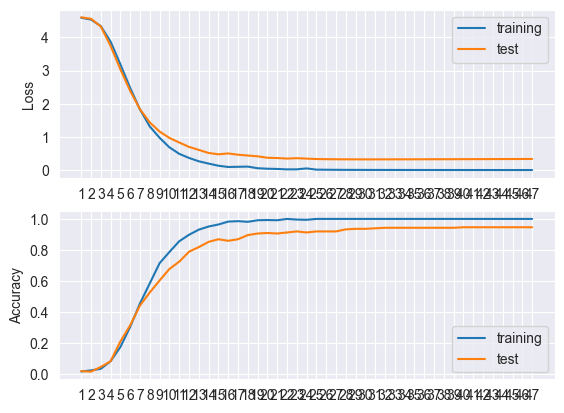

In [26]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

### With activation function PReLU

In [48]:
model.set_model(input_size=X_train.shape[1], output_size=t_train.shape[1], activation_function='prelu')
model.set_optimizer(optim='SGD', lr=1e-3, reg=1e-4)
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test)

Epoch 1/500, Loss: 4.59754, Accuracy: 0.43%
Epoch 2/500, Loss: 4.59324, Accuracy: 0.87%
Epoch 3/500, Loss: 4.58903, Accuracy: 1.59%
Epoch 4/500, Loss: 4.58479, Accuracy: 1.88%
Epoch 5/500, Loss: 4.58046, Accuracy: 1.73%
Epoch 6/500, Loss: 4.57591, Accuracy: 1.44%
Epoch 7/500, Loss: 4.57102, Accuracy: 1.30%
Epoch 8/500, Loss: 4.56560, Accuracy: 1.30%
Epoch 9/500, Loss: 4.55944, Accuracy: 1.30%
Epoch 10/500, Loss: 4.55215, Accuracy: 1.30%
Epoch 11/500, Loss: 4.54347, Accuracy: 1.30%
Epoch 12/500, Loss: 4.53288, Accuracy: 1.30%
Epoch 13/500, Loss: 4.51994, Accuracy: 1.44%
Epoch 14/500, Loss: 4.50439, Accuracy: 1.88%
Epoch 15/500, Loss: 4.48587, Accuracy: 2.31%
Epoch 16/500, Loss: 4.46395, Accuracy: 1.73%
Epoch 17/500, Loss: 4.43868, Accuracy: 1.59%
Epoch 18/500, Loss: 4.40990, Accuracy: 2.02%
Epoch 19/500, Loss: 4.37693, Accuracy: 2.45%
Epoch 20/500, Loss: 4.33853, Accuracy: 3.46%
Epoch 21/500, Loss: 4.29237, Accuracy: 5.05%
Epoch 22/500, Loss: 4.23387, Accuracy: 7.94%
Epoch 23/500, Loss:

In [49]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 95.96% on test data


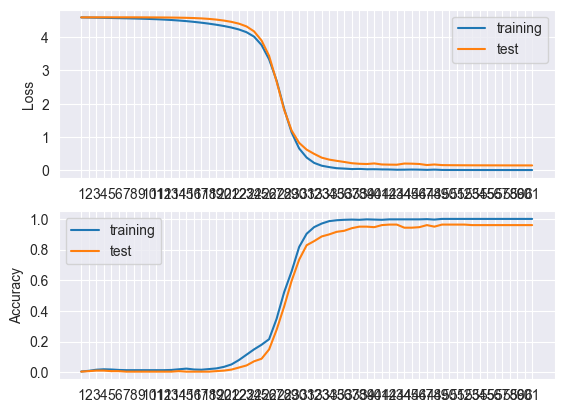

In [50]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')

### Hyperparameters optimization

In [51]:
lr_choices = [1e-4, 1e-3, 1e-2, 1e-1]
reg_choices = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
best_params_prelu, accuracy_historic_prelu = model.k_fold_cross_validation(X_train, t_train, lr_choices=lr_choices, reg_choices=reg_choices)

testing parameters: learning_rate = 1e-04,    regularization = 1e-09
K = 0, accuracy: 0.964
K = 1, accuracy: 0.942
K = 2, accuracy: 0.935
K = 3, accuracy: 0.928
K = 4, accuracy: 0.935
Best val accuracy: 0.941 | lr: 1e-04 | l2_reg: 1e-09
testing parameters: learning_rate = 1e-04,    regularization = 1e-08
K = 0, accuracy: 0.899
K = 1, accuracy: 0.935
K = 2, accuracy: 0.921
K = 3, accuracy: 0.899
K = 4, accuracy: 0.920
testing parameters: learning_rate = 1e-04,    regularization = 1e-07
K = 0, accuracy: 0.928
K = 1, accuracy: 0.957
K = 2, accuracy: 0.899
K = 3, accuracy: 0.964
K = 4, accuracy: 0.957
Best val accuracy: 0.941 | lr: 1e-04 | l2_reg: 1e-07
testing parameters: learning_rate = 1e-04,    regularization = 1e-06
K = 0, accuracy: 0.892
K = 1, accuracy: 0.971
K = 2, accuracy: 0.971
K = 3, accuracy: 0.949
K = 4, accuracy: 0.899
testing parameters: learning_rate = 1e-04,    regularization = 1e-05
K = 0, accuracy: 0.928
K = 1, accuracy: 0.950
K = 2, accuracy: 0.950
K = 3, accuracy: 0.9

[Text(0.5, 23.52222222222222, 'weight decay'),
 Text(50.722222222222214, 0.5, 'learning rate')]

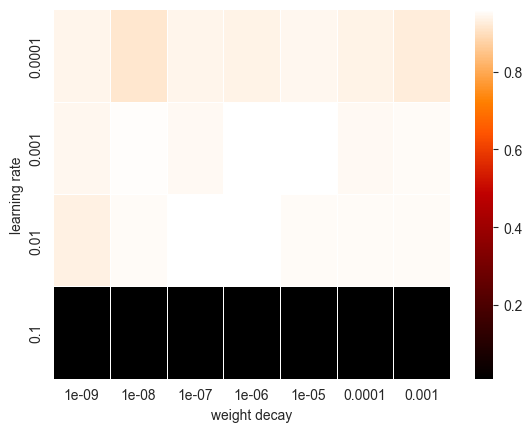

In [52]:
ax = sns.heatmap(accuracy_historic_prelu, linewidths=0.5, cmap='gist_heat', 
                 xticklabels=reg_choices, 
                 yticklabels=lr_choices)
ax.set(xlabel='weight decay', ylabel='learning rate')

In [53]:
best_params_prelu

(0.01, 1e-06)

### Complete learning with the best hyperparameters

In [54]:
model.set_optimizer(optim='SGD', lr=best_params_prelu[0], reg=best_params_prelu[1])
loss_train, accuracy_train, loss_test, accuracy_test = model.training(X_train, t_train, X_test, t_test, tol=1e-5)

Epoch 1/500, Loss: 4.58486, Accuracy: 1.59%
Epoch 2/500, Loss: 4.41268, Accuracy: 3.46%
Epoch 3/500, Loss: 3.07364, Accuracy: 21.65%
Epoch 4/500, Loss: 1.54824, Accuracy: 52.96%
Epoch 5/500, Loss: 0.79303, Accuracy: 76.33%
Epoch 6/500, Loss: 0.64392, Accuracy: 82.68%
Epoch 7/500, Loss: 0.42554, Accuracy: 88.46%
Epoch 8/500, Loss: 0.19954, Accuracy: 94.52%
Epoch 9/500, Loss: 0.20819, Accuracy: 94.95%
Epoch 10/500, Loss: 0.10521, Accuracy: 97.40%
Epoch 11/500, Loss: 0.14805, Accuracy: 96.68%
Epoch 12/500, Loss: 0.01846, Accuracy: 99.28%
Epoch 13/500, Loss: 0.00328, Accuracy: 100.00%
Epoch 14/500, Loss: 0.00117, Accuracy: 100.00%
Epoch 15/500, Loss: 0.00077, Accuracy: 100.00%
Epoch 16/500, Loss: 0.00061, Accuracy: 100.00%
Epoch 17/500, Loss: 0.00050, Accuracy: 100.00%
Epoch 18/500, Loss: 0.00043, Accuracy: 100.00%
Epoch 19/500, Loss: 0.00037, Accuracy: 100.00%
Epoch 20/500, Loss: 0.00033, Accuracy: 100.00%
Epoch 21/500, Loss: 0.00029, Accuracy: 100.00%
Epoch 22/500, Loss: 0.00027, Accurac

In [55]:
print("Model accuracy of {:.2f}% on test data".format(accuracy_test[-1]*100))

Model accuracy of 96.97% on test data


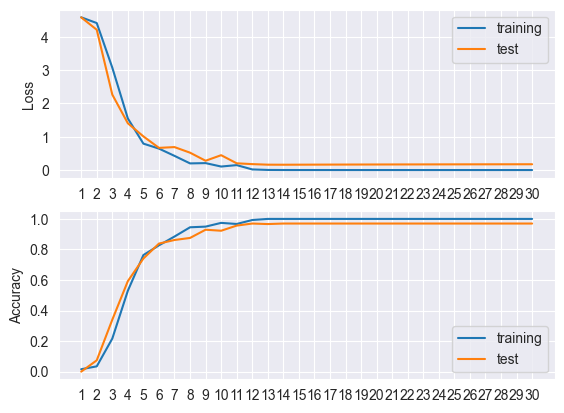

In [56]:
plot_training(loss_train, accuracy_train, loss_test, accuracy_test, 'test')